In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

csvpath = os.path.join('..','Resources','city_data.csv')
csvpath2 = os.path.join('..','Resources','ride_data.csv')

city = pd.read_csv(csvpath)
ride =pd.read_csv(csvpath2)

In [5]:
city.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
ride.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [24]:
## merge the two csv
test = pd.merge(city, ride, on='city')
test.sort_values('city', ascending=True).head()


,city,driver_count,type,date,fare,ride_id
1523,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
1522,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
1529,Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674
1524,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492
1525,Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421


In [12]:
grouped_data = test.groupby('city')
grouped_data['fare'].mean().head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [14]:
grouped_data.count().head()

,driver_count,type,date,fare,ride_id
city,,,,,
Amandaburgh,18,18,18,18,18
Barajasview,22,22,22,22,22
Barronchester,16,16,16,16,16
Bethanyland,18,18,18,18,18
Bradshawfurt,10,10,10,10,10


In [107]:
z=grouped_data['driver_count'].sum()/grouped_data['driver_count'].count()
color_assign = city.sort_values('city', ascending=True)
color_assign = color_assign.reset_index(drop=True)
color_assign

,city,driver_count,type
0,Amandaburgh,12,Urban
1,Barajasview,26,Urban
2,Barronchester,11,Suburban
3,Bethanyland,22,Suburban
4,Bradshawfurt,7,Rural
5,Brandonfort,10,Suburban
6,Carriemouth,52,Urban
7,Christopherfurt,41,Urban
8,Colemanland,23,Suburban
9,Davidfurt,23,Suburban


Text(0.5,1,'Pyber Ride Sharing Data (2016)')

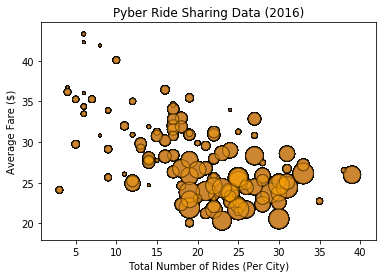

In [106]:
bubbles_mpl = plt.figure()

total_rides = grouped_data['date'].count()
average_fare = grouped_data['fare'].mean()
city_obs = grouped_data['city']
driver_count = grouped_data['driver_count']
city_type = grouped_data['type']
for i in range(len(grouped)):
    if color_assign.iloc[i,2] == "Urban":
        color = "orange"
    elif color_assign.iloc[i,2] == "Suburban":
        color = "blue"
    else:
        color = "yellow"
    plt.scatter(total_rides[],average_fare,s=z*6 , c=color, alpha=.3 , edgecolors='black' )
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')

In [103]:
len(grouped)

120